In [8]:
import sys; sys.path.insert(0,'../../../mySoftware/MySoftwarePackage/mac'); from plot_tools import *
sys.path.insert(0,'../mac/');
anafiles_dir = '/Users/erezcohen/Desktop/DensityFluctuations/AnaFiles/csv_files'
%matplotlib inline
from matplotlib.ticker import NullFormatter

In [9]:
generic = lambda x: ast.literal_eval(x)

In [10]:
# read an array of floating-point numbers from the csv file...
def get_array_from_list_cell(df=None,variable=None):
    array = []
    for x in np.concatenate([(df[variable]).ravel()]):
        if type(x)==type([0.1,0.2]): # just an array of floating-point numbers
            for x_object in x:
                if x_object!=-9999: array.append(x_object)
        else:
            if x!=-9999: array.append(x)
    return array

# load data

In [11]:
samples = dict({'configuration name':['12C/correlations','12C/no-correlations'] #,'208Pb/correlations','208Pb/no-correlations'
               ,'file name':['c12-ico6-10k_rd200','c12-ico0-50k'] # ,'Pb208-ico3-skin-10k','Pb208-ico0-skin-10k'
               ,'label':['$^{12}$C with correlations','$^{12}$C no correlations'] # ,'$^{208}$Pb with correlations','$^{208}$Pb no correlations'
              })

In [12]:
A=12
N , Z = 6.,6.
Npairs= dict({'pp':(Z*(Z-1)/2),
              'nn':(N*(N-1)/2),
              'np':(Z*N),
              'NN':(A*(A-1)/2),
              })

In [13]:
distances = dict()
for file_name,label in zip(samples['file name'],samples['label']):
    distances[label] = pd.read_csv('/Users/erezcohen/Desktop/DensityFluctuations/anafiles/'+file_name+'_NNdistances.csv'                      
                                   ,converters={'pp-distances':generic,'nn-distances':generic
                                                ,'np-distances':generic,'NN-distances':generic})
    print len(distances[label]),'distances in ',label

10000 distances in  $^{12}$C with correlations
10000 distances in  $^{12}$C no correlations


In [14]:
i_sample = 1
configuration_name = samples['configuration name'][i_sample]; 
file_name = samples['file name'][i_sample]; 
label = samples['label'][i_sample]; 
sample = distances[label]
print 'using',configuration_name

using 12C/no-correlations


In [15]:
# sample['NN-distances']=sample['NN-distances'].convert_objects(convert_numeric=True)
# sample['NN-distances']=sample['NN-distances'].astype(float).fillna(0.0)
# ast.literal_eval(sample['NN-distances'])
sample['NN-distances']
array = get_array_from_list_cell(df=sample,variable='NN-distances')
# array
# plt.hist( array , bins=bins ,color='blue', histtype='step',linewidth=2)

plotting $^{12}$C with correlations
nn integral: 15.3328047069
np integral: 35.9683952636
pp integral: 15.1460248106
NN integral: 66.4415226149
plotting $^{12}$C no correlations
nn integral: 11.8910120008
np integral: 28.2124626011
pp integral: 11.6041867494
NN integral: 51.7039816698


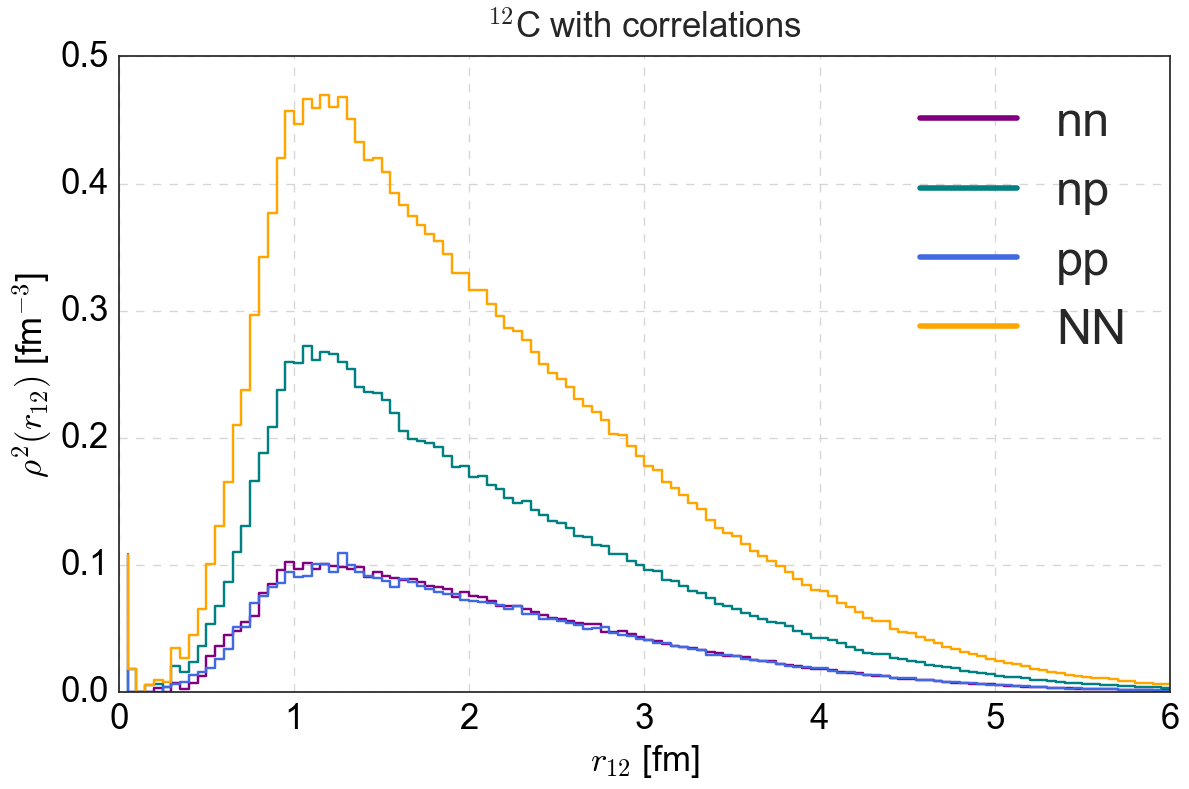

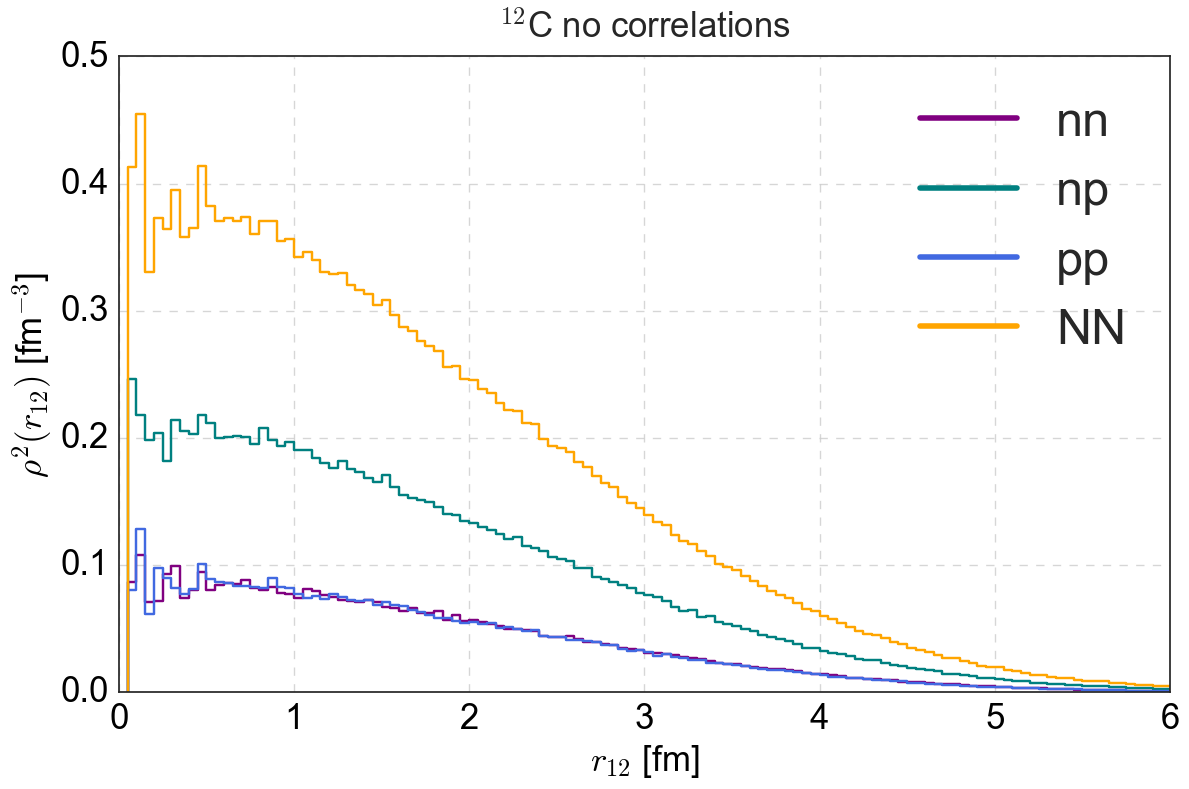

In [16]:
# number of pairs as a function of the distance form the center
bins = np.linspace(0,6,121)
xlim = (np.min(bins),np.max(bins))

for configuration_name,label in zip(samples['configuration name'],samples['label']):
    print 'plotting',label 
    sample = distances[label]    
    fig,ax = plt.subplots(figsize=(12,8))
    for i,(pair_type,color) in enumerate(zip(['nn','np','pp','NN']
                                             ,['purple','teal','royalblue','orange'])):
        r_12 = get_array_from_list_cell(df=sample,variable=pair_type+'-distances')
        weights = 1./(np.square(r_12))
        h,edges = np.histogram( r_12, weights=weights , bins=bins , normed=1)
        norm_fact = float(Npairs[pair_type])/float(Npairs['NN'])
        plt.step( bins[1:] , norm_fact*h , color=color )
                            
        integral = np.sum([4*np.pi*bins[i]*bins[i]*(bins[i+1]-bins[i])*norm_fact*h[i] for i in range(len(bins)-1)])
        print pair_type,'integral:',integral
        plt.plot([0,0],[0,0],label=pair_type,linewidth=4,color=color)        
    set_axes(ax,'$r_{12}$ [fm]',y_label='$\\rho^{2}(r_{12})$ [fm$^{-3}$]',do_add_grid=True,title=label)
    plt.legend(fontsize=35)
    ax.set_xlim(xlim);ax.set_ylim(0,0.5);
    plt.tight_layout()

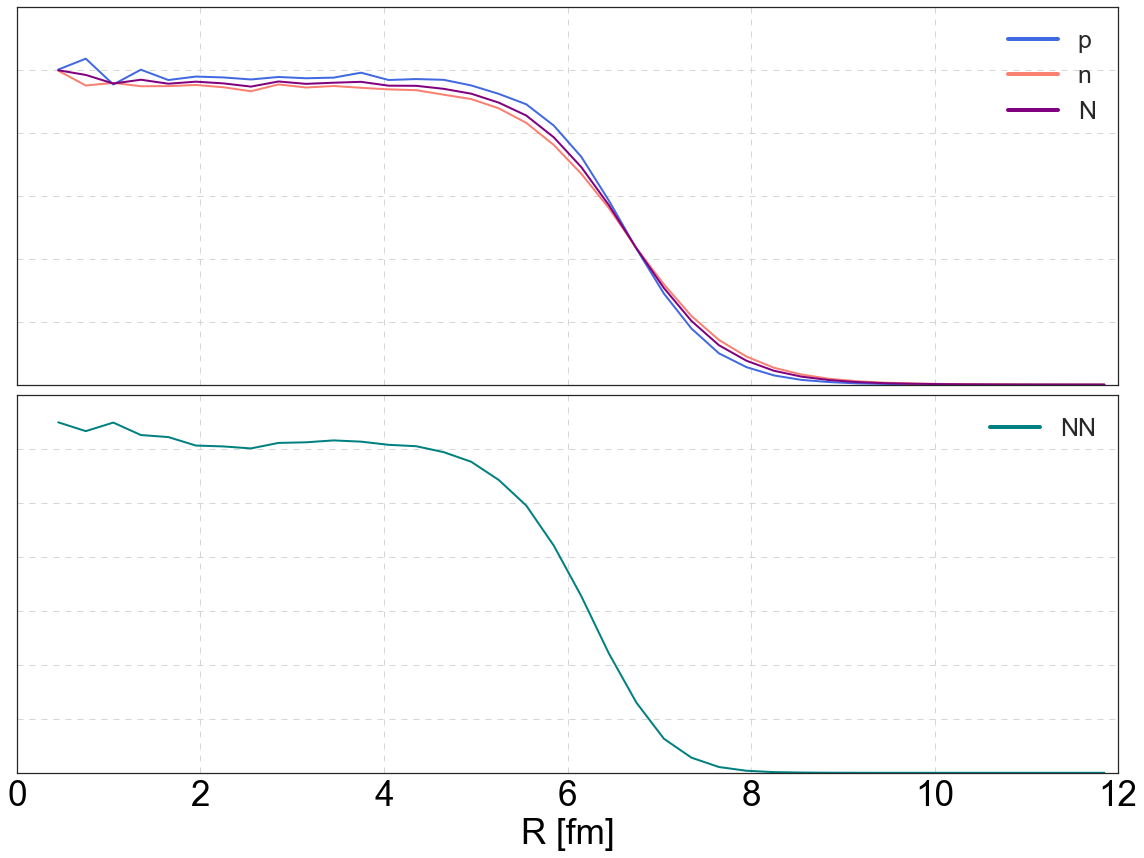

In [24]:
# now, to get the charge distribution - we need to divide by R2
# a plot to send Massi
bins = np.linspace(0,12,41)
xlim = (np.min(bins),np.max(bins))

d = 1.0 # fm
fig = plt.figure(figsize=(16,12))

ax=fig.add_subplot(2,1,1)
for i,(particle_type,color) in enumerate(zip(['p','n','N']
                                             ,['royalblue','salmon','purple'])):
    array = get_array_from_list_cell(df=sample,variable=particle_type+' distances')
    h,Rbins=np.histogram( array , bins=bins ,normed=1 )
    R = Rbins[1:]-0.5*(Rbins[1]-Rbins[0])
    h_R2 = h/np.square(R)
    plt.plot( R[1:] , h_R2[1:] ,color=color, linewidth=2)
    
    plt.plot([0,0],[0,0],label=particle_type,linewidth=4,color=color)        
set_axes(ax,'',do_add_grid=True)
plt.legend(fontsize=25)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(xlim)

    
ax=fig.add_subplot(2,1,2)
for i,(pair_type,color) in enumerate(zip(['NN']
                                         ,['teal'])):
    array = get_array_from_list_cell(df=sample,variable=pair_type+' < %.1f fm'%d)
    h,Rbins=np.histogram( array , bins=bins ,normed=1 )
    R = Rbins[1:]-0.5*(Rbins[1]-Rbins[0])
    h_R2 = h/np.square(R)
    plt.plot( R[1:] , h_R2[1:] ,color=color, linewidth=2)
    plt.plot([0,0],[0,0],label=pair_type,linewidth=4,color=color)        
set_axes(ax,'R [fm]',fontsize=35,do_add_grid=True)
plt.legend(fontsize=25)
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_xlim(xlim)
plt.tight_layout()